In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('audit.csv') 

In [5]:
df = df.dropna()

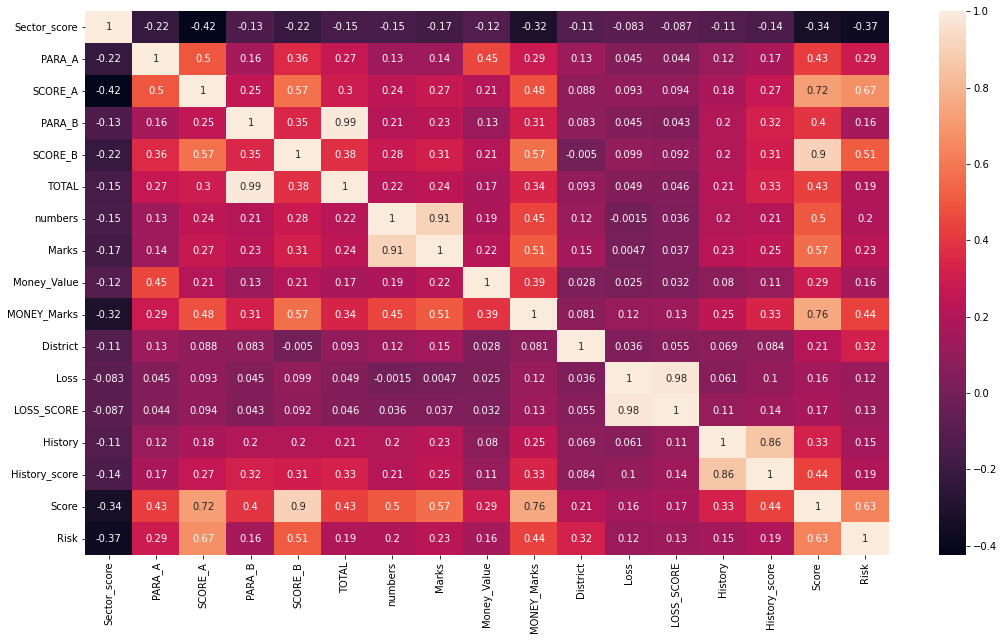

In [6]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
# separating the data and labels
X = df[['Score','PARA_A','SCORE_A','TOTAL']]
y = df['Risk']

Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(775, 4) (620, 4) (155, 4)


Training the Model

In [25]:
classifier = RandomForestClassifier()

In [26]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Score            0.451038
PARA_A           0.147954
SCORE_A          0.117918
TOTAL            0.095366
District         0.056507
SCORE_B          0.038690
PARA_B           0.034615
Money_Value      0.024901
MONEY_Marks      0.021190
Sector_score     0.005469
Loss             0.001627
LOSS_SCORE       0.001556
numbers          0.001295
History          0.001004
History_score    0.000437
Marks            0.000434
dtype: float64

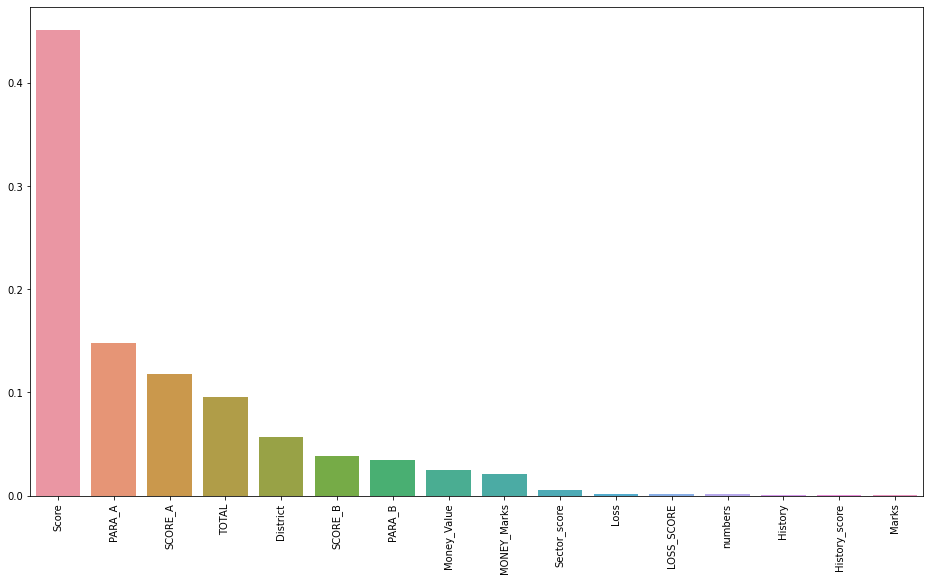

In [19]:
importances = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

Model Evaluation

In [27]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

In [28]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  1.0


In [29]:
labels = ['No Risk', 'Risk']

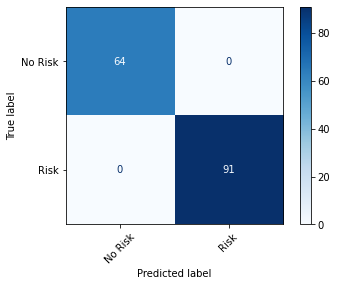

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [31]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Risk       1.00      1.00      1.00        64
        Risk       1.00      1.00      1.00        91

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155

